In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd

In [2]:
# Define the exact solution
def exact_solution_u(x, t):
    return (0.5*pi*torch.cos(x)+(x-pi*0.5))*torch.cos(t)

def initial_condition_u(x):
    return 0.5*pi*torch.cos(x) + (x - pi*0.5)

def initial_condition_u_t(x):
    return 0.0*pi*torch.cos(x) 

In [3]:
# Define the exact solution
def exact_solution_p(x, t):
    return 0.5*pi*torch.sin(x)*torch.cos(t)

def initial_condition_p(x):
    return 0.5*pi*torch.sin(x)

def initial_condition_p_t(x):
    return 0.0*pi*torch.cos(x) 

In [4]:
# importing files

In [5]:
inp_u1 = pd.read_csv(r'timo_data_u1_inverse.csv', header = None)
inp_u2 = pd.read_csv(r'timo_data_u2_inverse.csv', header = None)
inp_u3 = pd.read_csv(r'timo_data_u3_inverse.csv', header = None)
inp_u4 = pd.read_csv(r'timo_data_u4_inverse.csv', header = None)
inp_u5 = pd.read_csv(r'timo_data_u5_inverse.csv', header = None)
inp_u6 = pd.read_csv(r'timo_data_u6_inverse.csv', header = None)
inp_u7 = pd.read_csv(r'timo_data_u7_inverse.csv', header = None)
inp_u8 = pd.read_csv(r'timo_data_u8_inverse.csv', header = None)
inp_u9 = pd.read_csv(r'timo_data_u9_inverse.csv', header = None)
inp_u10 = pd.read_csv(r'timo_data_u10_inverse.csv', header = None)
inp_u11 = pd.read_csv(r'timo_data_u11_inverse.csv', header = None)
inp_u12 = pd.read_csv(r'timo_data_u12_inverse.csv', header = None)
inp_u13 = pd.read_csv(r'timo_data_u13_inverse.csv', header = None)
inp_u14 = pd.read_csv(r'timo_data_u14_inverse.csv', header = None)

In [6]:
inp_p1 = pd.read_csv(r'timo_data_p1_inverse.csv', header = None)
inp_p2 = pd.read_csv(r'timo_data_p2_inverse.csv', header = None)
inp_p3 = pd.read_csv(r'timo_data_p3_inverse.csv', header = None)
inp_p4 = pd.read_csv(r'timo_data_p4_inverse.csv', header = None)
inp_p5 = pd.read_csv(r'timo_data_p5_inverse.csv', header = None)
inp_p6 = pd.read_csv(r'timo_data_p6_inverse.csv', header = None)
inp_p7 = pd.read_csv(r'timo_data_p7_inverse.csv', header = None)
inp_p8 = pd.read_csv(r'timo_data_p8_inverse.csv', header = None)
inp_p9 = pd.read_csv(r'timo_data_p9_inverse.csv', header = None)
inp_p10 = pd.read_csv(r'timo_data_p10_inverse.csv', header = None)
inp_p11 = pd.read_csv(r'timo_data_p11_inverse.csv', header = None)
inp_p12 = pd.read_csv(r'timo_data_p12_inverse.csv', header = None)
inp_p13 = pd.read_csv(r'timo_data_p13_inverse.csv', header = None)
inp_p14 = pd.read_csv(r'timo_data_p14_inverse.csv', header = None)

In [7]:
inp_u1 = inp_u1[::20]
inp_u2 = inp_u2[::20]
inp_u3 = inp_u3[::20]
inp_u4 = inp_u4[::20]
inp_u5 = inp_u5[::20]
inp_u6 = inp_u6[::20]
inp_u7 = inp_u7[::20]
inp_u8 = inp_u8[::20]
inp_u9 = inp_u9[::20]
inp_u10 = inp_u10[::20]
inp_u11 = inp_u11[::20]
inp_u12 = inp_u12[::20]
inp_u13 = inp_u13[::20]
inp_u14 = inp_u14[::20]

In [8]:
inp_p1 = inp_p1[::20]
inp_p2 = inp_p2[::20]
inp_p3 = inp_p3[::20]
inp_p4 = inp_p4[::20]
inp_p5 = inp_p5[::20]
inp_p6 = inp_p6[::20]
inp_p7 = inp_p7[::20]
inp_p8 = inp_p8[::20]
inp_p9 = inp_p9[::20]
inp_p10 = inp_p10[::20]
inp_p11 = inp_p11[::20]
inp_p12 = inp_p12[::20]
inp_p13 = inp_p13[::20]
inp_p14 = inp_p14[::20]

In [9]:
inputs_u1 = inp_u1.to_numpy()
inputs_p1 = inp_p1.to_numpy()
data_t1 = inputs_u1[:,0].astype(np.float32)
data_x1 = inputs_u1[:,1].astype(np.float32)
data_u1 = inputs_u1[:,2].astype(np.float32)
data_p1 = inputs_p1[:,2].astype(np.float32)
data_t1 = data_t1.reshape(-1, 1)
data_x1 = data_x1.reshape(-1, 1)
data_u1 = data_u1.reshape(-1, 1)
data_t1 = torch.from_numpy(data_t1)
data_x1 = torch.from_numpy(data_x1)
data_u1 = torch.from_numpy(data_u1)
data_p1 = torch.from_numpy(data_p1)
data_inp1 = torch.cat([data_x1, data_t1],1)

In [10]:
inputs_u2 = inp_u2.to_numpy()
inputs_p2 = inp_p2.to_numpy()
data_t2 = inputs_u2[:,0].astype(np.float32)
data_x2 = inputs_u2[:,1].astype(np.float32)
data_u2 = inputs_u2[:,2].astype(np.float32)
data_p2 = inputs_p2[:,2].astype(np.float32)
data_t2 = data_t2.reshape(-1, 1)
data_x2 = data_x2.reshape(-1, 1)
data_u2 = data_u2.reshape(-1, 1)
data_t2 = torch.from_numpy(data_t2)
data_x2 = torch.from_numpy(data_x2)
data_u2 = torch.from_numpy(data_u2)
data_p2 = torch.from_numpy(data_p2)
data_inp2 = torch.cat([data_x2, data_t2],1)

In [11]:
inputs_u3 = inp_u3.to_numpy()
inputs_p3 = inp_p3.to_numpy()
data_t3 = inputs_u3[:,0].astype(np.float32)
data_x3 = inputs_u3[:,1].astype(np.float32)
data_u3 = inputs_u3[:,2].astype(np.float32)
data_p3 = inputs_p3[:,2].astype(np.float32)
data_t3 = data_t3.reshape(-1, 1)
data_x3 = data_x3.reshape(-1, 1)
data_u3 = data_u3.reshape(-1, 1)
data_t3 = torch.from_numpy(data_t3)
data_x3 = torch.from_numpy(data_x3)
data_u3 = torch.from_numpy(data_u3)
data_p3 = torch.from_numpy(data_p3)
data_inp3 = torch.cat([data_x3, data_t3],1)

In [12]:
inputs_u4 = inp_u4.to_numpy()
inputs_p4 = inp_p4.to_numpy()
data_t4 = inputs_u4[:,0].astype(np.float32)
data_x4 = inputs_u4[:,1].astype(np.float32)
data_u4 = inputs_u4[:,2].astype(np.float32)
data_p4 = inputs_p4[:,2].astype(np.float32)
data_t4 = data_t4.reshape(-1, 1)
data_x4 = data_x4.reshape(-1, 1)
data_u4 = data_u4.reshape(-1, 1)
data_t4 = torch.from_numpy(data_t4)
data_x4 = torch.from_numpy(data_x4)
data_u4 = torch.from_numpy(data_u4)
data_p4 = torch.from_numpy(data_p4)
data_inp4 = torch.cat([data_x4, data_t4],1)

In [13]:
inputs_u5 = inp_u5.to_numpy()
inputs_p5 = inp_p5.to_numpy()
data_t5 = inputs_u5[:,0].astype(np.float32)
data_x5 = inputs_u5[:,1].astype(np.float32)
data_u5 = inputs_u5[:,2].astype(np.float32)
data_p5 = inputs_p5[:,2].astype(np.float32)
data_t5 = data_t5.reshape(-1, 1)
data_x5 = data_x5.reshape(-1, 1)
data_u5 = data_u5.reshape(-1, 1)
data_t5 = torch.from_numpy(data_t5)
data_x5 = torch.from_numpy(data_x5)
data_u5 = torch.from_numpy(data_u5)
data_p5 = torch.from_numpy(data_p5)
data_inp5 = torch.cat([data_x5, data_t5],1)

In [14]:
inputs_u6 = inp_u6.to_numpy()
inputs_p6 = inp_p6.to_numpy()
data_t6 = inputs_u6[:,0].astype(np.float32)
data_x6 = inputs_u6[:,1].astype(np.float32)
data_u6 = inputs_u6[:,2].astype(np.float32)
data_p6 = inputs_p6[:,2].astype(np.float32)
data_t6 = data_t6.reshape(-1, 1)
data_x6 = data_x6.reshape(-1, 1)
data_u6 = data_u6.reshape(-1, 1)
data_t6 = torch.from_numpy(data_t6)
data_x6 = torch.from_numpy(data_x6)
data_u6 = torch.from_numpy(data_u6)
data_p6 = torch.from_numpy(data_p6)
data_inp6 = torch.cat([data_x6, data_t6],1)

In [15]:
inputs_u7 = inp_u7.to_numpy()
inputs_p7 = inp_p7.to_numpy()
data_t7 = inputs_u7[:,0].astype(np.float32)
data_x7 = inputs_u7[:,1].astype(np.float32)
data_u7 = inputs_u7[:,2].astype(np.float32)
data_p7 = inputs_p7[:,2].astype(np.float32)
data_t7 = data_t7.reshape(-1, 1)
data_x7 = data_x7.reshape(-1, 1)
data_u7 = data_u7.reshape(-1, 1)
data_t7 = torch.from_numpy(data_t7)
data_x7 = torch.from_numpy(data_x7)
data_u7 = torch.from_numpy(data_u7)
data_p7 = torch.from_numpy(data_p7)
data_inp7 = torch.cat([data_x7, data_t7],1)

In [16]:
inputs_u8 = inp_u8.to_numpy()
inputs_p8 = inp_p8.to_numpy()
data_t8 = inputs_u8[:,0].astype(np.float32)
data_x8 = inputs_u8[:,1].astype(np.float32)
data_u8 = inputs_u8[:,2].astype(np.float32)
data_p8 = inputs_p8[:,2].astype(np.float32)
data_t8 = data_t8.reshape(-1, 1)
data_x8 = data_x8.reshape(-1, 1)
data_u8 = data_u8.reshape(-1, 1)
data_t8 = torch.from_numpy(data_t8)
data_x8 = torch.from_numpy(data_x8)
data_u8 = torch.from_numpy(data_u8)
data_p8 = torch.from_numpy(data_p8)
data_inp8 = torch.cat([data_x8, data_t8],1)

In [17]:
inputs_u9 = inp_u9.to_numpy()
inputs_p9 = inp_p9.to_numpy()
data_t9 = inputs_u9[:,0].astype(np.float32)
data_x9 = inputs_u9[:,1].astype(np.float32)
data_u9 = inputs_u9[:,2].astype(np.float32)
data_p9 = inputs_p9[:,2].astype(np.float32)
data_t9 = data_t9.reshape(-1, 1)
data_x9 = data_x9.reshape(-1, 1)
data_u9 = data_u9.reshape(-1, 1)
data_t9 = torch.from_numpy(data_t9)
data_x9 = torch.from_numpy(data_x9)
data_u9 = torch.from_numpy(data_u9)
data_p9 = torch.from_numpy(data_p9)
data_inp9 = torch.cat([data_x9, data_t9],1)

In [18]:
inputs_u10 = inp_u1.to_numpy()
inputs_p10 = inp_p1.to_numpy()
data_t10 = inputs_u10[:,0].astype(np.float32)
data_x10 = inputs_u10[:,1].astype(np.float32)
data_u10 = inputs_u10[:,2].astype(np.float32)
data_p10 = inputs_p10[:,2].astype(np.float32)
data_t10 = data_t10.reshape(-1, 1)
data_x10 = data_x10.reshape(-1, 1)
data_u10 = data_u10.reshape(-1, 1)
data_t10 = torch.from_numpy(data_t10)
data_x10 = torch.from_numpy(data_x10)
data_u10 = torch.from_numpy(data_u10)
data_p10 = torch.from_numpy(data_p10)
data_inp10 = torch.cat([data_x10, data_t10],1)

In [19]:
inputs_u11 = inp_u11.to_numpy()
inputs_p11 = inp_p11.to_numpy()
data_t11 = inputs_u11[:,0].astype(np.float32)
data_x11 = inputs_u11[:,1].astype(np.float32)
data_u11 = inputs_u11[:,2].astype(np.float32)
data_p11 = inputs_p11[:,2].astype(np.float32)
data_t11 = data_t11.reshape(-1, 1)
data_x11 = data_x11.reshape(-1, 1)
data_u11 = data_u11.reshape(-1, 1)
data_t11 = torch.from_numpy(data_t11)
data_x11 = torch.from_numpy(data_x11)
data_u11 = torch.from_numpy(data_u11)
data_p11 = torch.from_numpy(data_p11)
data_inp11 = torch.cat([data_x11, data_t11],1)

In [20]:
inputs_u12 = inp_u12.to_numpy()
inputs_p12 = inp_p12.to_numpy()
data_t12 = inputs_u12[:,0].astype(np.float32)
data_x12 = inputs_u12[:,1].astype(np.float32)
data_u12 = inputs_u12[:,2].astype(np.float32)
data_p12 = inputs_p12[:,2].astype(np.float32)
data_t12 = data_t12.reshape(-1, 1)
data_x12 = data_x12.reshape(-1, 1)
data_u12 = data_u12.reshape(-1, 1)
data_t12 = torch.from_numpy(data_t12)
data_x12 = torch.from_numpy(data_x12)
data_u12 = torch.from_numpy(data_u12)
data_p12 = torch.from_numpy(data_p12)
data_inp12 = torch.cat([data_x12, data_t12],1)

In [21]:
inputs_u13 = inp_u13.to_numpy()
inputs_p13 = inp_p13.to_numpy()
data_t13 = inputs_u13[:,0].astype(np.float32)
data_x13 = inputs_u13[:,1].astype(np.float32)
data_u13 = inputs_u13[:,2].astype(np.float32)
data_p13 = inputs_p13[:,2].astype(np.float32)
data_t13 = data_t13.reshape(-1, 1)
data_x13 = data_x13.reshape(-1, 1)
data_u13 = data_u13.reshape(-1, 1)
data_t13 = torch.from_numpy(data_t13)
data_x13 = torch.from_numpy(data_x13)
data_u13 = torch.from_numpy(data_u13)
data_p13 = torch.from_numpy(data_p13)
data_inp13 = torch.cat([data_x13, data_t13],1)

In [22]:
inputs_u14 = inp_u14.to_numpy()
inputs_p14 = inp_p14.to_numpy()
data_t14 = inputs_u14[:,0].astype(np.float32)
data_x14 = inputs_u14[:,1].astype(np.float32)
data_u14 = inputs_u14[:,2].astype(np.float32)
data_p14 = inputs_p14[:,2].astype(np.float32)
data_t14 = data_t14.reshape(-1, 1)
data_x14 = data_x14.reshape(-1, 1)
data_u14 = data_u14.reshape(-1, 1)
data_t14 = torch.from_numpy(data_t14)
data_x14 = torch.from_numpy(data_x14)
data_u14 = torch.from_numpy(data_u14)
data_p14 = torch.from_numpy(data_p14)
data_inp14 = torch.cat([data_x14, data_t14],1)

In [23]:
# assigning number of points
initial_pts = 200
left_boundary_pts = 200
right_boundary_pts = 200
residual_pts = 1000

In [24]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"

manualSeed = 1

#np.random.seed(manualSeed)
#random.seed(manualSeed)
torch.manual_seed(manualSeed)

x_init = pi*torch.rand((initial_pts,1)) # initial pts
t_init = 0*x_init
init =  torch.cat([x_init, t_init],1)
u_init = initial_condition_u(init[:,0]).reshape(-1, 1)
p_init = initial_condition_p(init[:,0]).reshape(-1, 1)
w_init = torch.cat([u_init, p_init],1)

u_t_init = initial_condition_u_t(init[:,0]).reshape(-1, 1)
p_t_init = initial_condition_p_t(init[:,0]).reshape(-1, 1)
w_t_init = torch.cat([u_t_init, p_t_init],1)



xb_left = torch.zeros((left_boundary_pts, 1)) # left spatial boundary
tb_left = torch.rand((left_boundary_pts, 1)) # 
b_left = torch.cat([xb_left, tb_left ],1)
u_b_l = exact_solution_u(xb_left, tb_left)
p_b_l = exact_solution_p(xb_left, tb_left)
w_b_l = torch.cat([u_b_l, p_b_l],1)



xb_right = pi*torch.ones((right_boundary_pts, 1)) # right spatial boundary
tb_right = torch.rand((right_boundary_pts, 1)) # right boundary pts
b_right = torch.cat([xb_right, tb_right ],1)
u_b_r = exact_solution_u(xb_right, tb_right)
p_b_r = exact_solution_p(xb_right, tb_right)
w_b_r = torch.cat([u_b_r, p_b_r],1)

x_interior = pi*torch.rand((residual_pts, 1))
t_interior = torch.rand((residual_pts, 1))
interior = torch.cat([x_interior, t_interior],1)





training_set = DataLoader(torch.utils.data.TensorDataset(init, w_init, w_t_init, b_left,  b_right), batch_size=200, shuffle=False)

In [25]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)


In [26]:
# Model definition
my_network = NeuralNet(input_dimension = init.shape[1], output_dimension = 3, n_hidden_layers=4, neurons=20)

In [27]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)


In [28]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [29]:
def fit(model, training_set, interior, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (initial, w_initial, w_initial_t, bd_left,  bd_right) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # for initial
                initial.requires_grad = True
                w_initial_pred_ = model(initial)
                u_initial_pred_ = w_initial_pred_[:,0].reshape(-1,1)
                p_initial_pred_ = w_initial_pred_[:,1].reshape(-1,1)
                
                
                # with derivative
                inpu = torch.ones(initial_pts, 1 )
                
                grad_u_ini = torch.autograd.grad(u_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                
                u_initial_t = grad_u_ini[:, 1]
                
                
                grad_p_ini = torch.autograd.grad(p_initial_pred_, initial, grad_outputs=inpu, create_graph=True)[0]
                
                p_initial_t = grad_p_ini[:, 1]
                
                
                # for left boundary
                w_bd_left_pred_ = model(bd_left)
                u_bd_left_pred_ = w_bd_left_pred_[:,0].reshape(-1,1)
                p_bd_left_pred_ = w_bd_left_pred_[:,1].reshape(-1,1)
                # for right boundary
                w_bd_right_pred_ = model(bd_right)
                u_bd_right_pred_ = w_bd_right_pred_[:,0].reshape(-1,1)
                p_bd_right_pred_ = w_bd_right_pred_[:,1].reshape(-1,1)
                
                # residual calculation
                interior.requires_grad = True
                w_hat = model(interior)
                

                u_hat = w_hat[:,0].reshape(-1,1)
                p_hat = w_hat[:,1].reshape(-1,1)
                inputs = torch.ones(residual_pts, 1 )
                inputs2 = torch.ones(residual_pts, 1)
                grad_u_hat = torch.autograd.grad(u_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_x = grad_u_hat[:, 0].reshape(-1,1)
                
                grad_u_hat_xx = torch.autograd.grad(u_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_xx = grad_u_hat_xx[:, 0].reshape(-1,1)
                
                u_data_pred1 = model(data_inp1)
                
                u_data_pred2 = model(data_inp2)
                
                u_data_pred3 = model(data_inp3)
                
                u_data_pred4 = model(data_inp4)
               
                u_data_pred5 = model(data_inp5)
                
                u_data_pred6 = model(data_inp6)
                
                u_data_pred7 = model(data_inp7)
                
                u_data_pred8 = model(data_inp8)
                
                u_data_pred9 = model(data_inp9)
                
                u_data_pred10 = model(data_inp10)
                
                u_data_pred11 = model(data_inp11)
                
                u_data_pred12 = model(data_inp12)
                
                u_data_pred13 = model(data_inp13)
                
                u_data_pred14 = model(data_inp14)
                
                
                
                
                
                
                grad_p_hat = torch.autograd.grad(p_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_x = grad_p_hat[:, 0].reshape(-1,1)
                
                grad_p_hat_xx = torch.autograd.grad(p_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_xx = grad_p_hat_xx[:, 0].reshape(-1,1)
                
                
                
                #grad_grad_u_x = torch.autograd.grad(u_x, interior, grad_outputs=torch.ones(interior.shape[0]), create_graph=True)[0]
                #u_xx = grad_grad_u_x[:, 0]
                u_t = grad_u_hat[:, 1].reshape(-1,1)
                
                grad_u_hat_tt = torch.autograd.grad(u_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_tt = grad_u_hat_tt[:, 1].reshape(-1,1)
                
                p_t = grad_p_hat[:,1].reshape(-1,1)
                grad_p_hat_tt = torch.autograd.grad(p_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_tt = grad_p_hat_tt[:, 1].reshape(-1,1)
                
                
                
                # Item 1. below
                loss1 = torch.mean((u_initial_t.reshape(-1, ) - w_initial_t[:,0].reshape(-1, ))**p)+torch.mean((u_initial_pred_.reshape(-1, ) - w_initial[:,0].reshape(-1, ))**p) + torch.mean((w_hat[:,2]*u_tt.reshape(-1, ) - u_xx.reshape(-1, ) + u_hat.reshape(-1, ) - p_x.reshape(-1, ))**p)+torch.mean((u_bd_left_pred_.reshape(-1,)- u_b_l.reshape(-1,))**p) + torch.mean((u_bd_right_pred_.reshape(-1,)- u_b_r.reshape(-1,))**p)
                loss2 = torch.mean((p_initial_pred_.reshape(-1, ) - w_initial[:,1].reshape(-1, ))**p)+ torch.mean((p_initial_t.reshape(-1, ) - w_initial_t[:,1].reshape(-1, ))**p) + torch.mean((p_tt.reshape(-1, )  + u_x.reshape(-1, ) - p_xx.reshape(-1, ) -torch.cos(interior[:, 1]).reshape(-1, ) + pi*0.5*torch.sin(interior[:, 0])*torch.cos(interior[:, 1]).reshape(-1, ))**p)+torch.mean((p_bd_left_pred_.reshape(-1,)- p_b_l.reshape(-1,))**p) + torch.mean((p_bd_right_pred_.reshape(-1,)- p_b_r.reshape(-1,))**p) 
                # - torch.cos(interior[:, 1]).reshape(-1, ) + pi*0.5*torch.sin(interior[:, 0])*torch.cos(interior[:, 1]).reshape(-1, )
                #data = torch.mean((u_data_pred1[:,1].reshape(-1, )- data_p1.reshape(-1, ))**p) + torch.mean((u_data_pred2[:,1].reshape(-1, ) - data_p2.reshape(-1, ))**p) + torch.mean((u_data_pred3[:,1].reshape(-1, ) - data_p3.reshape(-1, ))**p)+ torch.mean((u_data_pred4[:,1].reshape(-1, ) - data_p4.reshape(-1, ))**p)+ torch.mean((u_data_pred5[:,1].reshape(-1, ) - data_p5.reshape(-1, ))**p)
                #data1 = torch.mean((u_data_pred1[:,0].reshape(-1, )- data_u1.reshape(-1, ))**p) + torch.mean((u_data_pred2[:,0].reshape(-1, ) - data_u2.reshape(-1, ))**p) + torch.mean((u_data_pred3[:,0].reshape(-1, ) - data_u3.reshape(-1, ))**p)+ torch.mean((u_data_pred4[:,0].reshape(-1, ) - data_u4.reshape(-1, ))**p)+torch.mean((u_data_pred5[:,0].reshape(-1, ) - data_u5.reshape(-1, ))**p)
                #data2 = torch.mean((u_data_pred14[:,1].reshape(-1, )- data_p14.reshape(-1, ))**p) + torch.mean((u_data_pred13[:,1].reshape(-1, ) - data_p13.reshape(-1, ))**p) + torch.mean((u_data_pred12[:,1].reshape(-1, ) - data_p12.reshape(-1, ))**p)+ torch.mean((u_data_pred11[:,1].reshape(-1, ) - data_p11.reshape(-1, ))**p)+ torch.mean((u_data_pred10[:,1].reshape(-1, ) - data_p10.reshape(-1, ))**p)
                #data3 = torch.mean((u_data_pred14[:,0].reshape(-1, )- data_u14.reshape(-1, ))**p) + torch.mean((u_data_pred13[:,0].reshape(-1, ) - data_u13.reshape(-1, ))**p) + torch.mean((u_data_pred12[:,0].reshape(-1, ) - data_u12.reshape(-1, ))**p)+ torch.mean((u_data_pred11[:,0].reshape(-1, ) - data_u11.reshape(-1, ))**p)+torch.mean((u_data_pred10[:,0].reshape(-1, ) - data_u10.reshape(-1, ))**p)
                #data4 = torch.mean((u_data_pred9[:,1].reshape(-1, )- data_p9.reshape(-1, ))**p) + torch.mean((u_data_pred8[:,1].reshape(-1, ) - data_p8.reshape(-1, ))**p) + torch.mean((u_data_pred7[:,1].reshape(-1, ) - data_p7.reshape(-1, ))**p)+ torch.mean((u_data_pred6[:,1].reshape(-1, ) - data_p6.reshape(-1, ))**p)+ torch.mean((u_data_pred5[:,1].reshape(-1, ) - data_p5.reshape(-1, ))**p)
                 #data5 = torch.mean((u_data_pred9[:,0].reshape(-1, )- data_u9.reshape(-1, ))**p) + torch.mean((u_data_pred8[:,0].reshape(-1, ) - data_u8.reshape(-1, ))**p) + torch.mean((u_data_pred7[:,0].reshape(-1, ) - data_u7.reshape(-1, ))**p)+ torch.mean((u_data_pred6[:,0].reshape(-1, ) - data_u6.reshape(-1, ))**p)+torch.mean((u_data_pred5[:,0].reshape(-1, ) - data_u5.reshape(-1, ))**p)
                data = torch.mean((u_data_pred1[:,1].reshape(-1, )- data_p1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,1].reshape(-1, ) - data_p4.reshape(-1, ))**p)
                data1 = torch.mean((u_data_pred1[:,0].reshape(-1, )- data_u1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,0].reshape(-1, ) - data_u4.reshape(-1, ))**p)
                data2 = torch.mean((u_data_pred14[:,1].reshape(-1, )- data_p14.reshape(-1, ))**p) +  torch.mean((u_data_pred12[:,1].reshape(-1, ) - data_p12.reshape(-1, ))**p)
                data3 = torch.mean((u_data_pred14[:,0].reshape(-1, )- data_u14.reshape(-1, ))**p) + torch.mean((u_data_pred12[:,0].reshape(-1, ) - data_u12.reshape(-1, ))**p)
                data4 =  torch.mean((u_data_pred8[:,1].reshape(-1, ) - data_p8.reshape(-1, ))**p) 
                data5 =  torch.mean((u_data_pred8[:,0].reshape(-1, ) - data_u8.reshape(-1, ))**p) 
                
                  #                
                
                loss = loss1 + loss2 + data + data1 + data2 + data3 + data4 +  data5
                #+ data
                #loss = torch.max(torch.abs((u_initial_pred_.reshape(-1, ) - u_initial.reshape(-1, )))) + torch.max(torch.abs((u_t.reshape(-1, ) - u_xx.reshape(-1, ))))+torch.max(torch.abs((u_bd_left_pred_.reshape(-1,)))) + torch.max(torch.abs((u_bd_right_pred_.reshape(-1,))))
                # + torch.mean((u_data_pred2[:,1].reshape(-1, ) - data_p2.reshape(-1, ))**p) + torch.mean((u_data_pred3[:,1].reshape(-1, ) - data_p3.reshape(-1, ))**p)
                
                
                
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history



In [30]:
n_epochs = 5000
#history = fit(my_network, training_set, interior, n_epochs, optimizer_, p=2, verbose=True )

In [31]:
# saving and loading Model
FILE = "single_inverse.pth"
#torch.save(my_network, FILE)

# uncomment below when you need to test for different points
my_network = torch.load(FILE)
my_network.eval()

NeuralNet(
  (activation): Tanh()
  (input_layer): Linear(in_features=2, out_features=20, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=20, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
  )
  (output_layer): Linear(in_features=20, out_features=3, bias=True)
)

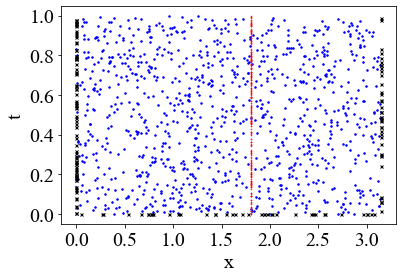

In [32]:
x_interior = pi*torch.rand((residual_pts, 1))
t_interior = torch.rand((residual_pts, 1))
interior = torch.cat([x_interior, t_interior],1)
x_init = pi*torch.rand((initial_pts,1)) # initial pts
t_init = 0*x_init
#plt.plot(x_interior, 'ro', ms=1,)
plt.plot(x_interior, t_interior, 'bo', ms=1.5)

#plt.plot(data_x1[::20], data_t1[::20], 'ro', ms=0.5) 
#plt.plot(data_x14[::20], data_t14[::20], 'ro', ms=0.5) 
plt.plot(data_x8[::20], data_t8[::20], 'ro', ms=0.5)
#plt.plot(data_x12[::20], data_t12[::20], 'ro', ms=0.5)
#plt.plot(data_x4[::20], data_t4[::20], 'ro', ms=0.5)




xb_left = torch.zeros((left_boundary_pts, 2)) # left spatial boundary
tb_left = torch.rand((left_boundary_pts, 2)) # 
plt.plot(xb_left[::5], tb_left[::5], "kx", ms=3)

xb_right = pi*torch.ones((right_boundary_pts, 1)) # right spatial boundary
tb_right = torch.rand((right_boundary_pts, 1)) # right boundary pts
plt.plot(xb_right[::5], tb_right[::5], "kx", ms=3)
plt.plot(x_init[::5], t_init[::5], "kx", ms=3)

from matplotlib.font_manager import FontProperties
plt.rcParams['axes.unicode_minus'] = False
font_path = '/data/localhome/tkapoor/Desktop/Times_Roman_Fig/times-new-roman.ttf'
custom_font = FontProperties(fname=font_path)


plt.xlabel('x', fontsize=20, fontproperties=custom_font)
plt.ylabel('t', fontsize=20, fontproperties=custom_font)
plt.xticks(fontsize=20, fontproperties=custom_font)
plt.yticks(fontsize=20, fontproperties=custom_font)
plt.savefig('14.pdf', dpi = 300, bbox_inches = "tight")
plt.show()

plt.show()

In [33]:
x_test = torch.linspace(0, pi, 10000).reshape(-1,1)
t_test = 0.5*torch.ones((10000,1))
test = torch.cat([x_test, t_test],1)
u_test = exact_solution_u(x_test, t_test).reshape(-1,1)
p_test = exact_solution_p(x_test, t_test).reshape(-1,1)
w_test_pred = my_network(test)
u_test_pred = w_test_pred[:,0].reshape(-1,1)
p_test_pred = w_test_pred[:,1].reshape(-1,1)

In [34]:
print(torch.mean(w_test_pred[:,2]))

tensor(1.0136, grad_fn=<MeanBackward0>)


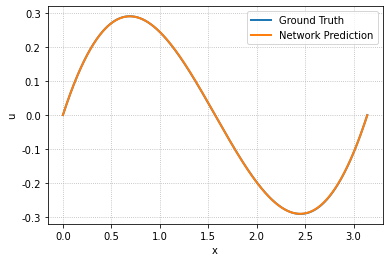

In [35]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, u_test, label="Ground Truth",lw=2)
plt.plot(x_test, u_test_pred[:, 0].detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [36]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((u_test_pred - u_test)**2)/torch.mean(u_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.0003773425532926922 %
